In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Importing Data

In [2]:
db <- read.csv2("training.csv",sep=',',dec='.')

In [3]:
head(db)

id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,...,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
PL000000,1,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,...,aparvvfowrjncdhp,8,Gasoline,Tourism,174,11040,1143,1270,33.1,0
PL042495,1,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,...,aparvvfowrjncdhp,10,Diesel,Tourism,174,11040,1143,1290,51.3,0
PL042496,1,0.196,Med1,2,1,Yearly,Yes,Retired,M,...,iwhqpdfuhrsxyqxe,8,Diesel,Commercial,150,14159,1193,1020,262.8,0
PL042497,1,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,...,kvcddisqpkysmvvo,4,Gasoline,Tourism,149,17233,1012,180,219.7,0
PL042498,1,0.000,Med1,2,2,Yearly,No,Retired,F,...,tdgkjlphosocwbgu,13,Gasoline,Tourism,200,19422,1315,30,70.3,0
PL042501,1,0.000,Med2,8,2,Yearly,No,Retired,F,...,xaklvfxsplowrglp,16,Gasoline,Tourism,196,24750,1200,210,366.5,0


In [4]:
str(db)

'data.frame':	228216 obs. of  26 variables:
 $ id_policy             : Factor w/ 57054 levels "PL000000","PL000001",..: 1 25383 25384 25385 25386 25387 25388 25389 25390 25391 ...
 $ year                  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ pol_no_claims_discount: num  0.332 0 0.196 0 0 0 0.018 0 0.087 0.584 ...
 $ pol_coverage          : Factor w/ 4 levels "Max","Med1","Med2",..: 3 3 2 3 2 3 1 1 2 4 ...
 $ pol_duration          : int  5 6 2 8 2 8 1 4 1 6 ...
 $ pol_sit_duration      : int  1 1 1 5 2 2 1 2 1 3 ...
 $ pol_pay_freq          : Factor w/ 4 levels "Biannual","Monthly",..: 2 2 4 4 4 4 4 2 4 3 ...
 $ pol_payd              : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ pol_usage             : Factor w/ 4 levels "AllTrips","Professional",..: 4 4 3 4 3 3 4 4 4 4 ...
 $ drv_sex1              : Factor w/ 2 levels "F","M": 2 2 2 1 1 1 2 1 2 2 ...
 $ drv_age1              : num  35 60 55 54 65 68 41 51 44 53 ...
 $ drv_age_lic1          : num  16 41 35 31 38 46 20 7 22 34

# Exploratory Analysis

In [5]:
dim(db)

[1] 228216     26

Each policy is observe in 4 years

In [6]:
length(unique(db$id_policy))
length(unique(db$id_policy))*4

[1] 57054

[1] 228216

In [7]:
summary(db)

    id_policy           year      pol_no_claims_discount pol_coverage 
 PL000000:     4   Min.   :1.00   Min.   :0.00000        Max :146516  
 PL000001:     4   1st Qu.:1.75   1st Qu.:0.00000        Med1: 21792  
 PL000003:     4   Median :2.50   Median :0.00000        Med2: 40072  
 PL000005:     4   Mean   :2.50   Mean   :0.04438        Min : 19836  
 PL000007:     4   3rd Qu.:3.25   3rd Qu.:0.00000                     
 PL000008:     4   Max.   :4.00   Max.   :1.00000                     
 (Other) :228192                                                      
  pol_duration   pol_sit_duration    pol_pay_freq   pol_payd    
 Min.   : 1.00   Min.   : 1.000   Biannual :66945   No :218696  
 1st Qu.: 5.00   1st Qu.: 3.000   Monthly  :70162   Yes:  9520  
 Median :11.00   Median : 4.000   Quarterly: 6259               
 Mean   :12.61   Mean   : 4.245   Yearly   :84850               
 3rd Qu.:18.00   3rd Qu.: 5.000                                 
 Max.   :44.00   Max.   :26.000           

In [8]:
colSums(is.na(db))

id_policy                   year pol_no_claims_discount 
                     0                      0                      0 
          pol_coverage           pol_duration       pol_sit_duration 
                     0                      0                      0 
          pol_pay_freq               pol_payd              pol_usage 
                     0                      0                      0 
              drv_sex1               drv_age1           drv_age_lic1 
                     0                      0                      0 
              drv_drv2               drv_sex2               drv_age2 
                     0                      0                 152896 
          drv_age_lic2          vh_make_model                 vh_age 
                152896                      0                      4 
               vh_fuel                vh_type               vh_speed 
                     0                      0                   2552 
              vh_value              vh_weight             population 
                  2552                   2552                      0 
     town_surface_area           claim_amount 
                     0                      0

In [9]:
round(colSums(is.na(db))*100/nrow(db))

id_policy                   year pol_no_claims_discount 
                     0                      0                      0 
          pol_coverage           pol_duration       pol_sit_duration 
                     0                      0                      0 
          pol_pay_freq               pol_payd              pol_usage 
                     0                      0                      0 
              drv_sex1               drv_age1           drv_age_lic1 
                     0                      0                      0 
              drv_drv2               drv_sex2               drv_age2 
                     0                      0                     67 
          drv_age_lic2          vh_make_model                 vh_age 
                    67                      0                      0 
               vh_fuel                vh_type               vh_speed 
                     0                      0                      1 
              vh_value              vh_weight             population 
                     1                      1                      0 
     town_surface_area           claim_amount 
                     0                      0

In [10]:
to_remove <- c("drv_sex2","drv_age2","drv_age_lic2","vh_make_model")

db <- db[names(db)[-which(names(db)%in%to_remove)]]

In [11]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [12]:
imp <- preProcess(db, method = "medianImpute")
db <- predict(imp, db)

In [13]:
summary(db)

    id_policy           year      pol_no_claims_discount pol_coverage 
 PL000000:     4   Min.   :1.00   Min.   :0.00000        Max :146516  
 PL000001:     4   1st Qu.:1.75   1st Qu.:0.00000        Med1: 21792  
 PL000003:     4   Median :2.50   Median :0.00000        Med2: 40072  
 PL000005:     4   Mean   :2.50   Mean   :0.04438        Min : 19836  
 PL000007:     4   3rd Qu.:3.25   3rd Qu.:0.00000                     
 PL000008:     4   Max.   :4.00   Max.   :1.00000                     
 (Other) :228192                                                      
  pol_duration   pol_sit_duration    pol_pay_freq   pol_payd    
 Min.   : 1.00   Min.   : 1.000   Biannual :66945   No :218696  
 1st Qu.: 5.00   1st Qu.: 3.000   Monthly  :70162   Yes:  9520  
 Median :11.00   Median : 4.000   Quarterly: 6259               
 Mean   :12.61   Mean   : 4.245   Yearly   :84850               
 3rd Qu.:18.00   3rd Qu.: 5.000                                 
 Max.   :44.00   Max.   :26.000           

## Categorial variables

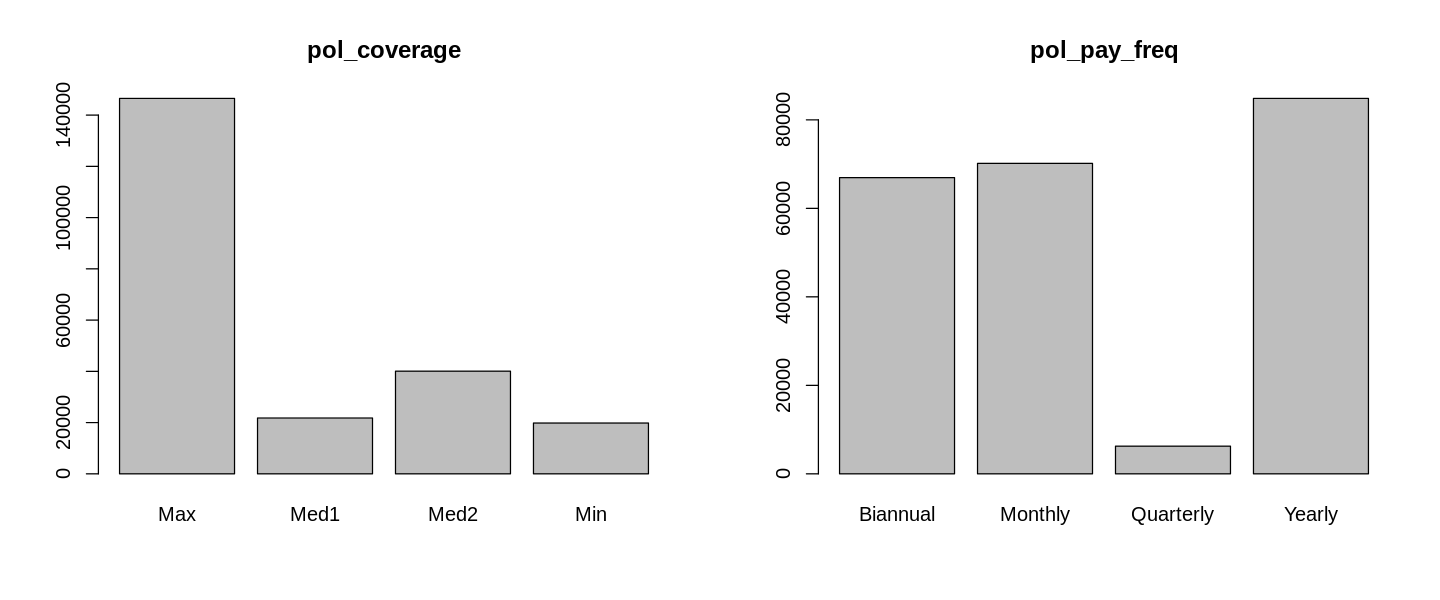

In [14]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))
barplot(table(db$pol_coverage),main="pol_coverage")
barplot(table(db$pol_pay_freq),main="pol_pay_freq")

In [15]:
db$pol_coverage <- relevel( db$pol_coverage , ref= "Min")
db$pol_pay_freq <- relevel( db$pol_pay_freq, ref="Quarterly")

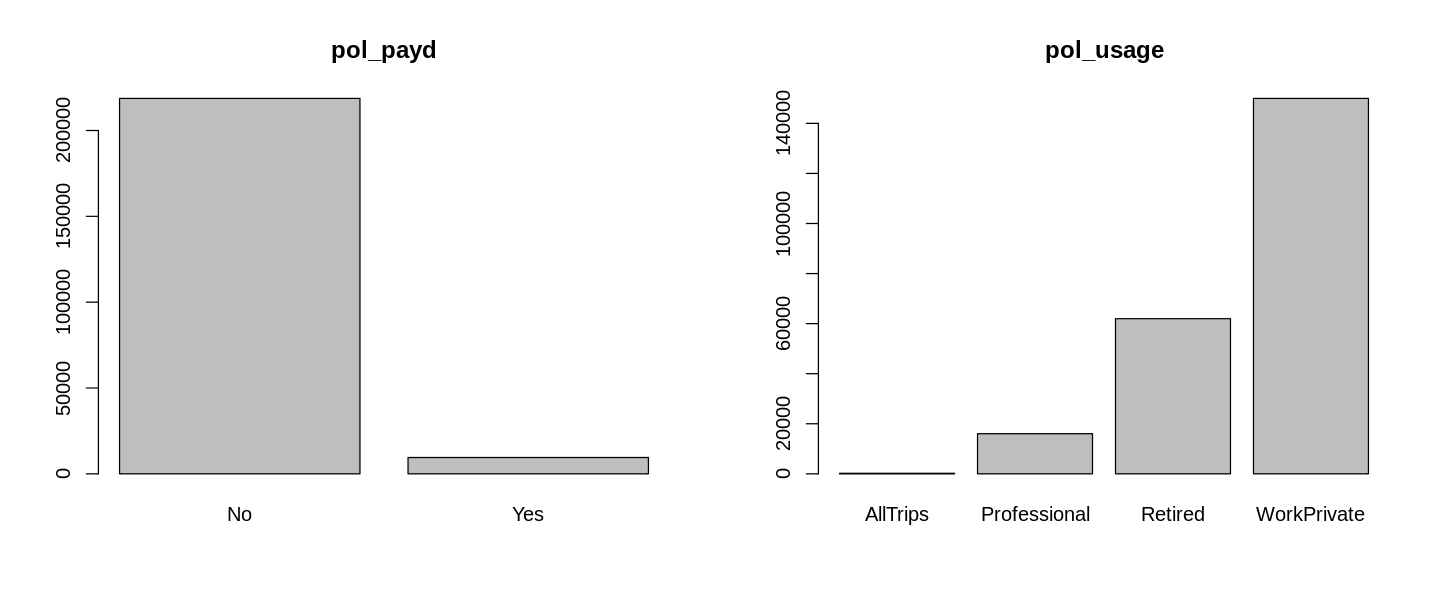

In [16]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))
barplot(table(db$pol_payd),main="pol_payd")
barplot(table(db$pol_usage),main="pol_usage")

In [17]:
db <- db %>% mutate(
    pol_usage_rm=as.factor(ifelse(vh_fuel=="AllTrips","Professional",as.character(pol_usage)))
)  

In [18]:
db$pol_payd <- relevel(db$pol_payd, ref="Yes")
db$pol_usage_rm <- relevel(db$pol_usage_rm, ref="Professional")

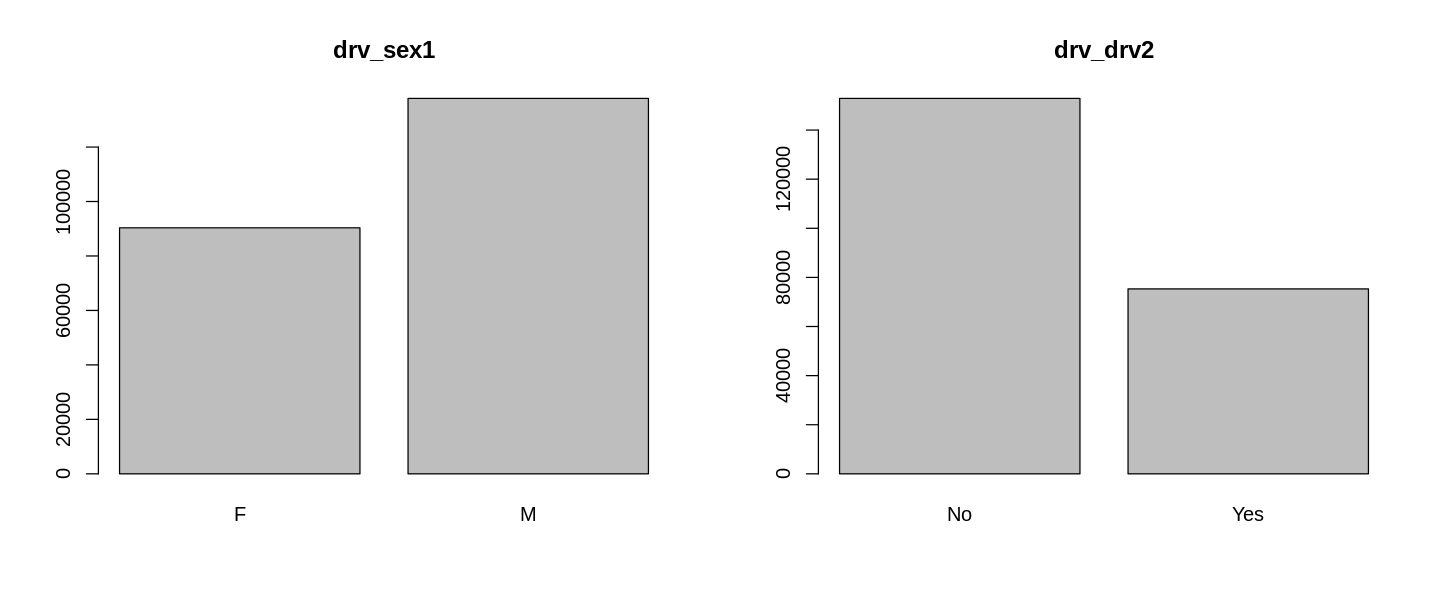

In [19]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))
barplot(table(db$drv_sex1),main="drv_sex1")
barplot(table(db$drv_drv2),main="drv_drv2")

In [20]:
db$drv_sex1 <- relevel(db$drv_sex1, ref="M")
db$drv_drv2 <- relevel(db$drv_drv2, ref="No")

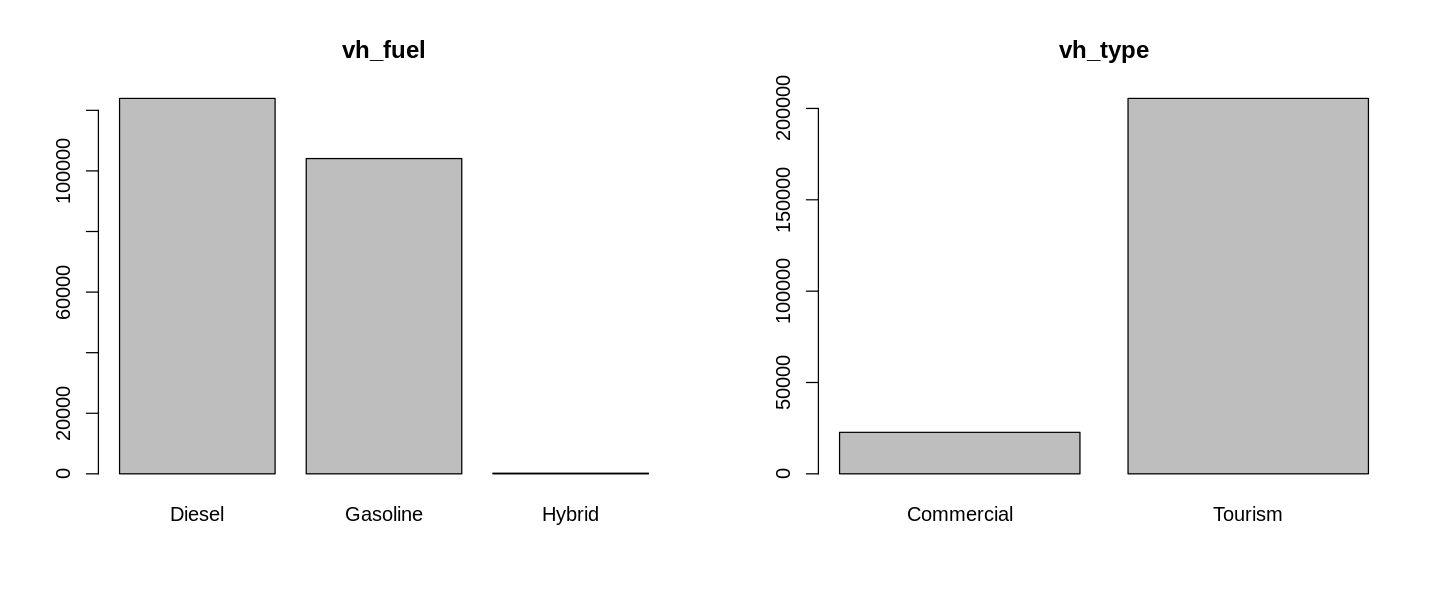

In [21]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))              
barplot(table(db$vh_fuel),main="vh_fuel")
barplot(table(db$vh_type ),main="vh_type")

In [22]:
db <- db %>% mutate(
    vh_fuel_rm=as.factor(ifelse(vh_fuel=="Hybrid","Gasoline",as.character(vh_fuel)))
)  

In [25]:
db$vh_fuel <- relevel(db$vh_fuel,ref="Gasoline")
db$vh_type <- relevel(db$vh_type, ref= "Commercial")

In [26]:
cat_features <- c("pol_coverage","pol_pay_freq","pol_payd","pol_usage","drv_sex1","drv_drv2","vh_fuel","vh_type")


## Continuous Variables

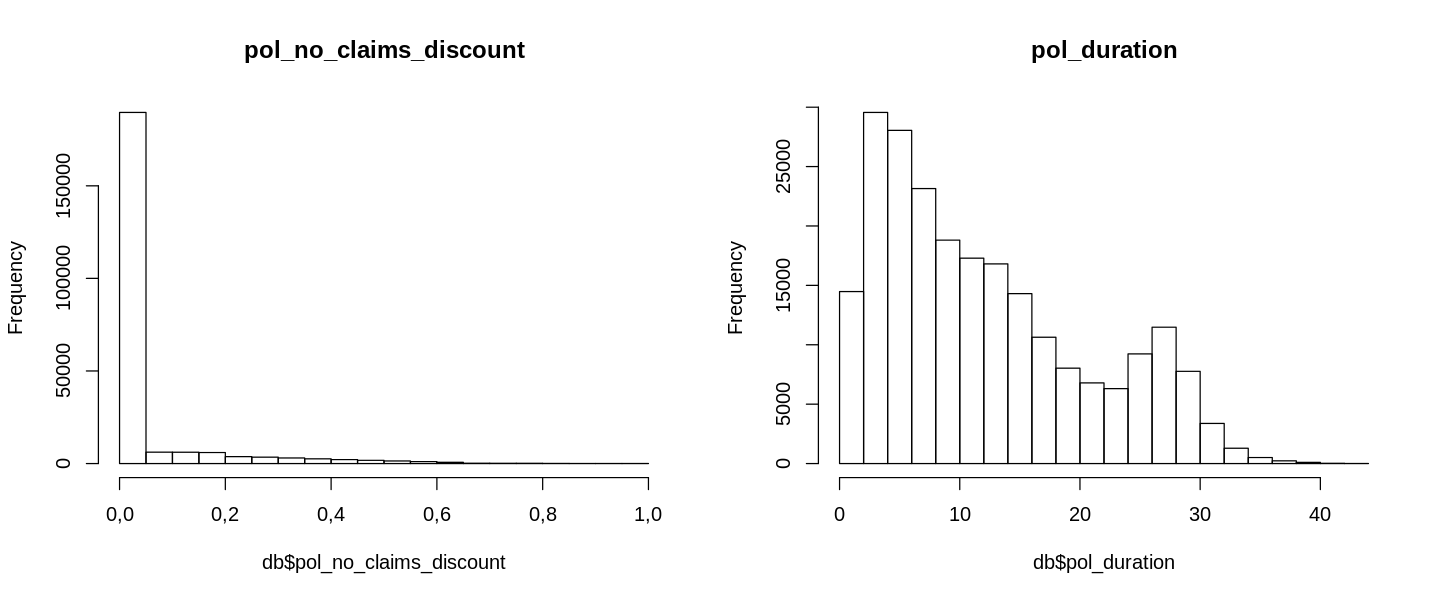

In [27]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))              
hist(db$pol_no_claims_discount,main="pol_no_claims_discount")
hist(db$pol_duration,main="pol_duration")

In [28]:
table(db$pol_duration)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
 4998  9481 13192 16366 14740 13311 12095 11055  9877  8932  8582  8707  8516 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 8294  7633  6670  5776  4858  4259  3771  3484  3305  3181  3128  3999  5233 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
 5675  5804  4702  3061  2061  1318   809   480   315   192   138    93    58 
   40    41    42    43    44 
   42    15     6     3     1 

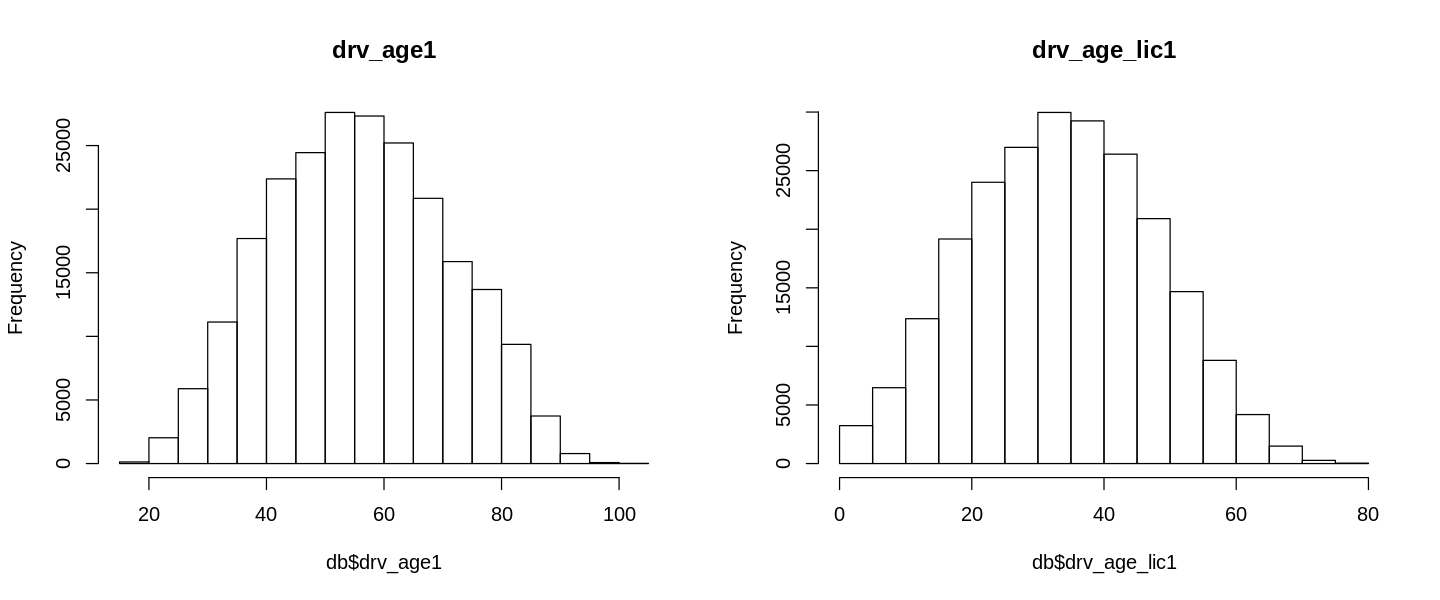

In [31]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
hist(db$drv_age1,main="drv_age1")
hist(db$drv_age_lic1,main="drv_age_lic1")

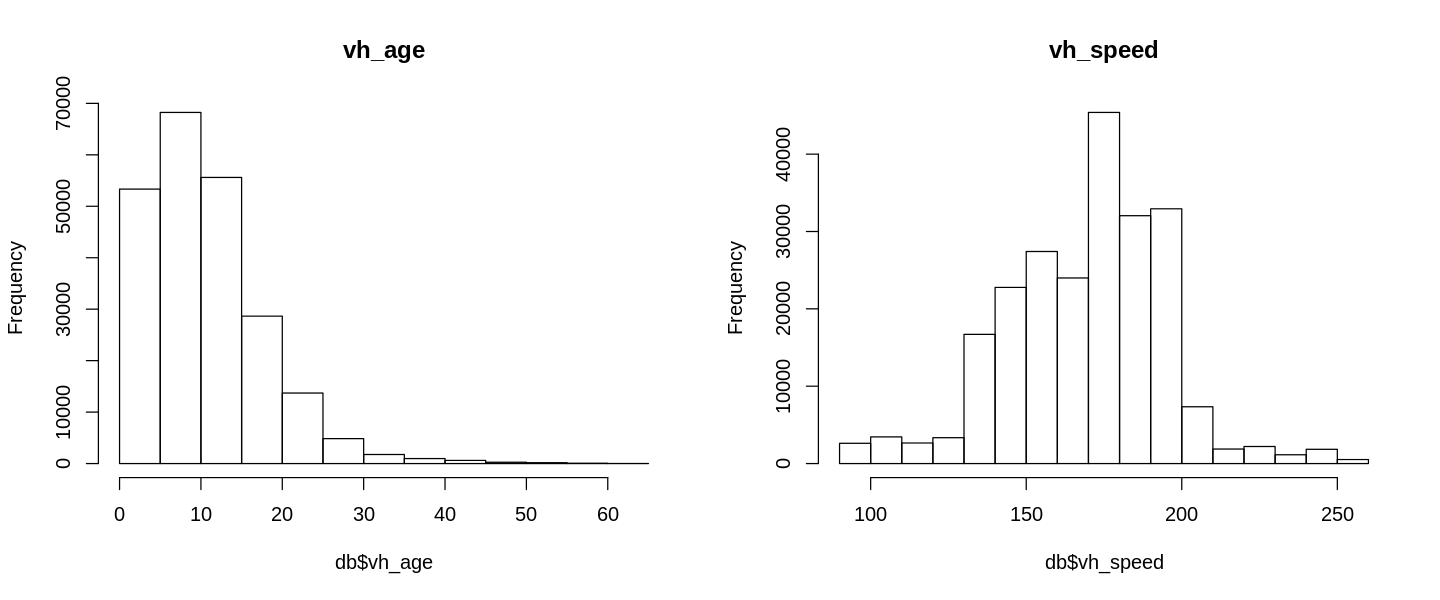

In [32]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
hist(db$vh_age,main="vh_age")
hist(db$vh_speed,main="vh_speed")

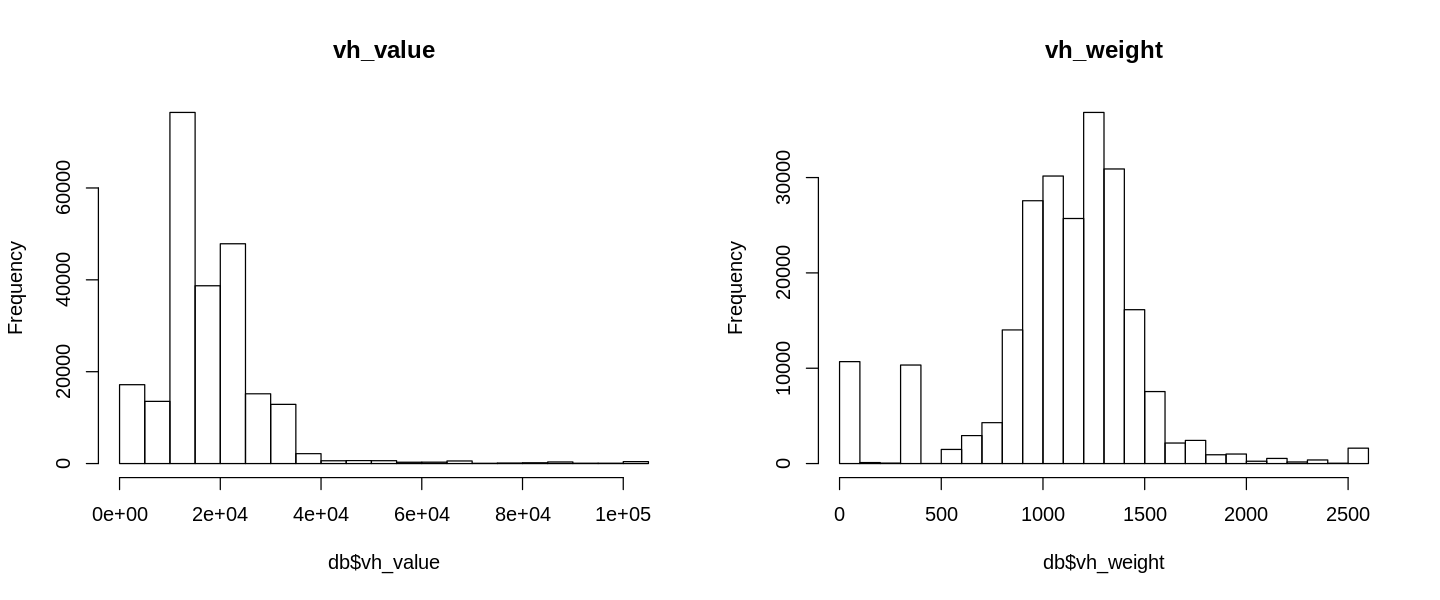

In [33]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
hist(db$vh_value,main="vh_value")
hist(db$vh_weight,main="vh_weight")

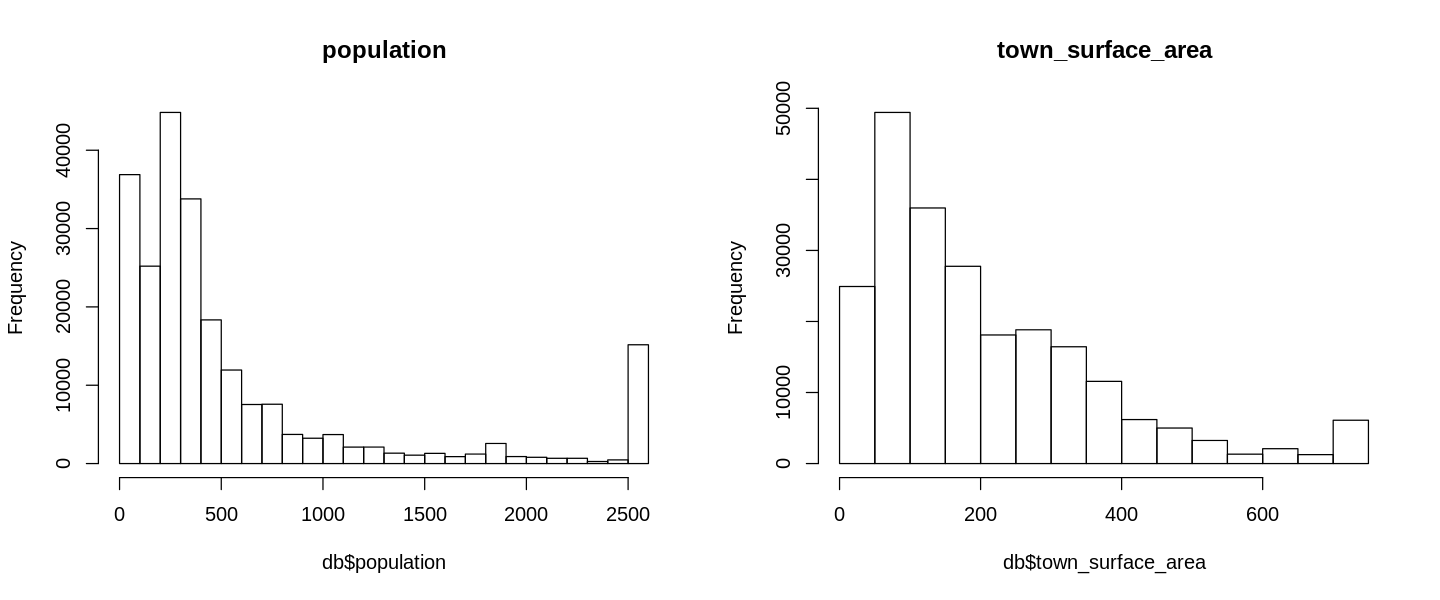

In [34]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
hist(db$population,main="population")
hist(db$town_surface_area,main="town_surface_area")

In [37]:
library("corrplot")
con_features <- c("pol_no_claims_discount","pol_duration","drv_age1","drv_age_lic1",
                 "vh_age","vh_speed","vh_value","vh_weight","population","town_surface_area")

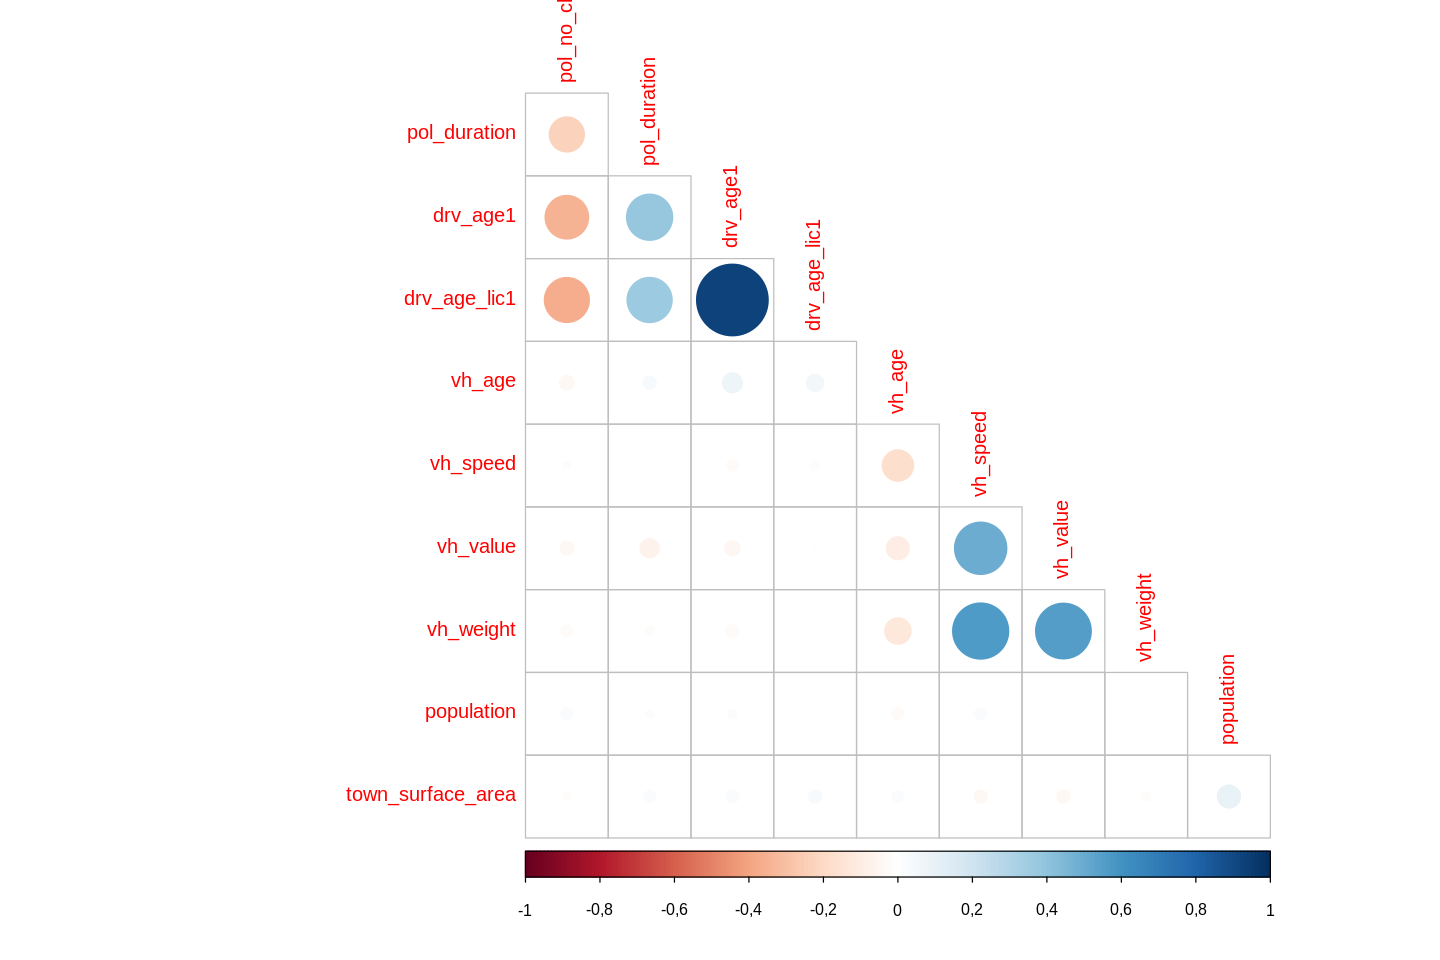

In [38]:
options(repr.plot.width=12, repr.plot.height=8)
corrplot(cor(db[,con_features], use="complete.obs"), method = "circle",type="lower",diag=FALSE) 

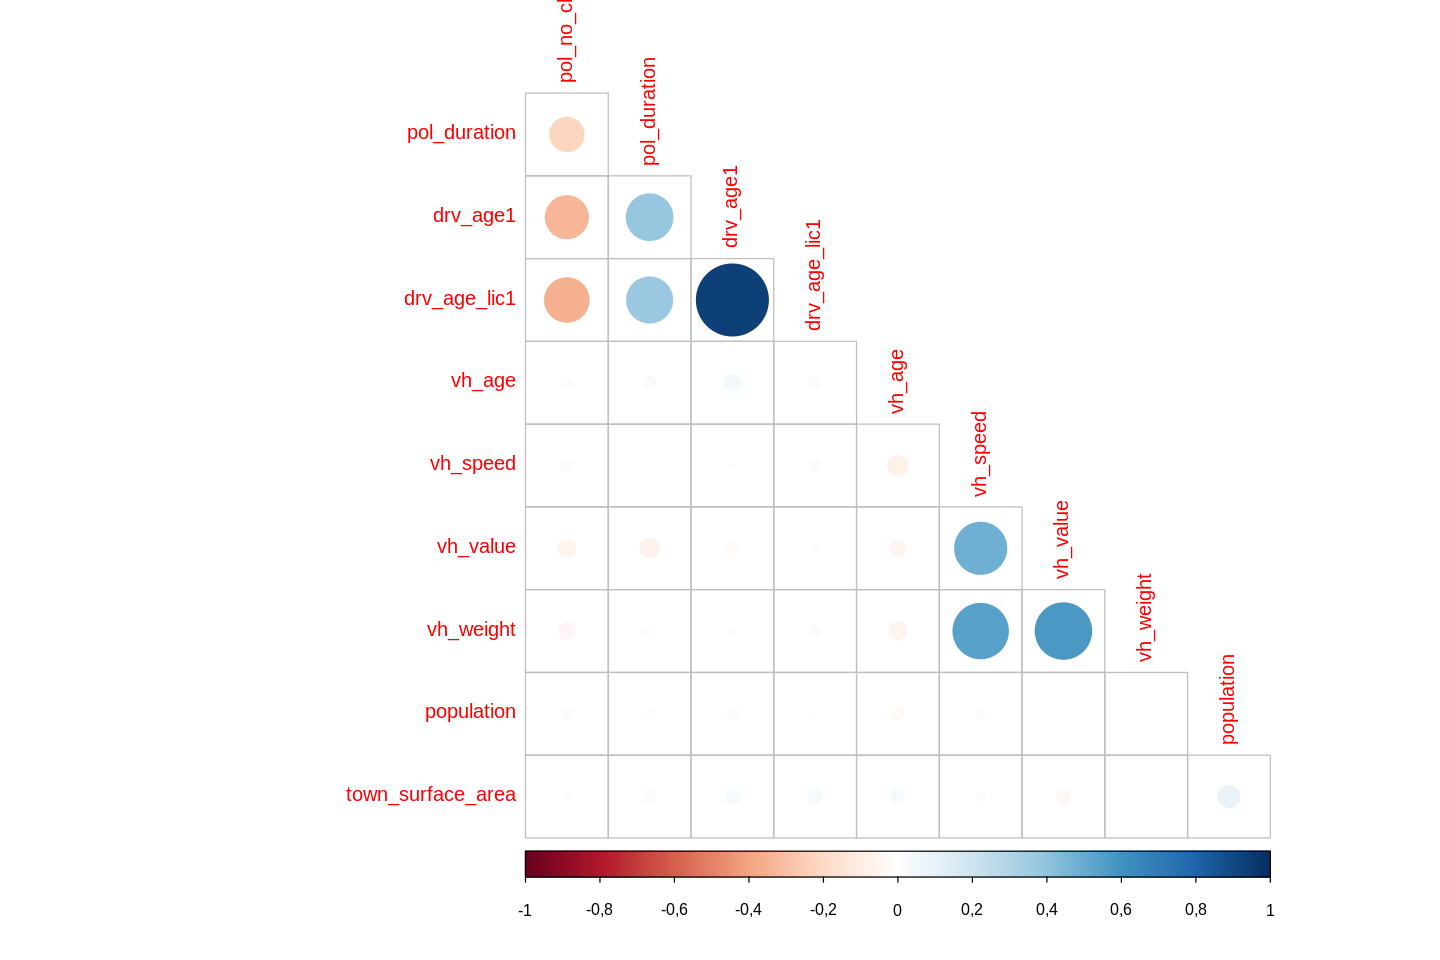

In [39]:
options(repr.plot.width=12, repr.plot.height=8)
corrplot(cor(db[db$claim_amount>0,con_features], use="complete.obs"), method = "circle",type="lower",diag=FALSE) 

## Response Variable

In [40]:
summary(db$claim_amount[db$claim_amount>0])

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0,02    324,29    690,53   1118,75   1288,79 141828,26 

In [41]:
summary(log(db$claim_amount[db$claim_amount>0]))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3,912   5,782   6,537   6,453   7,161  11,862 

In [42]:
round(table(db$claim_amount>0)/nrow(db),3)


FALSE  TRUE 
0,898 0,102 

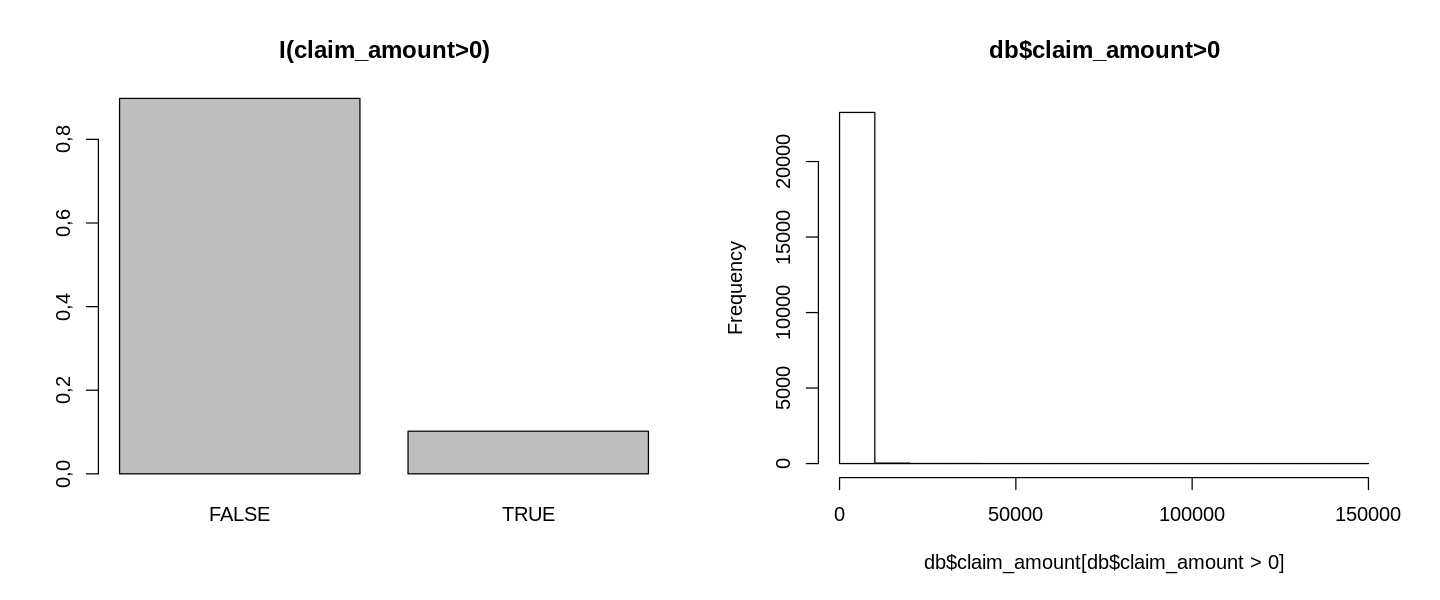

In [43]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
barplot(round(table(db$claim_amount>0)/nrow(db),3),main="I(claim_amount>0)")
hist(db$claim_amount[db$claim_amount>0],main="db$claim_amount>0")

In [44]:
db <- db %>% mutate(claims_or_not = as.numeric(db$claim_amount>0))

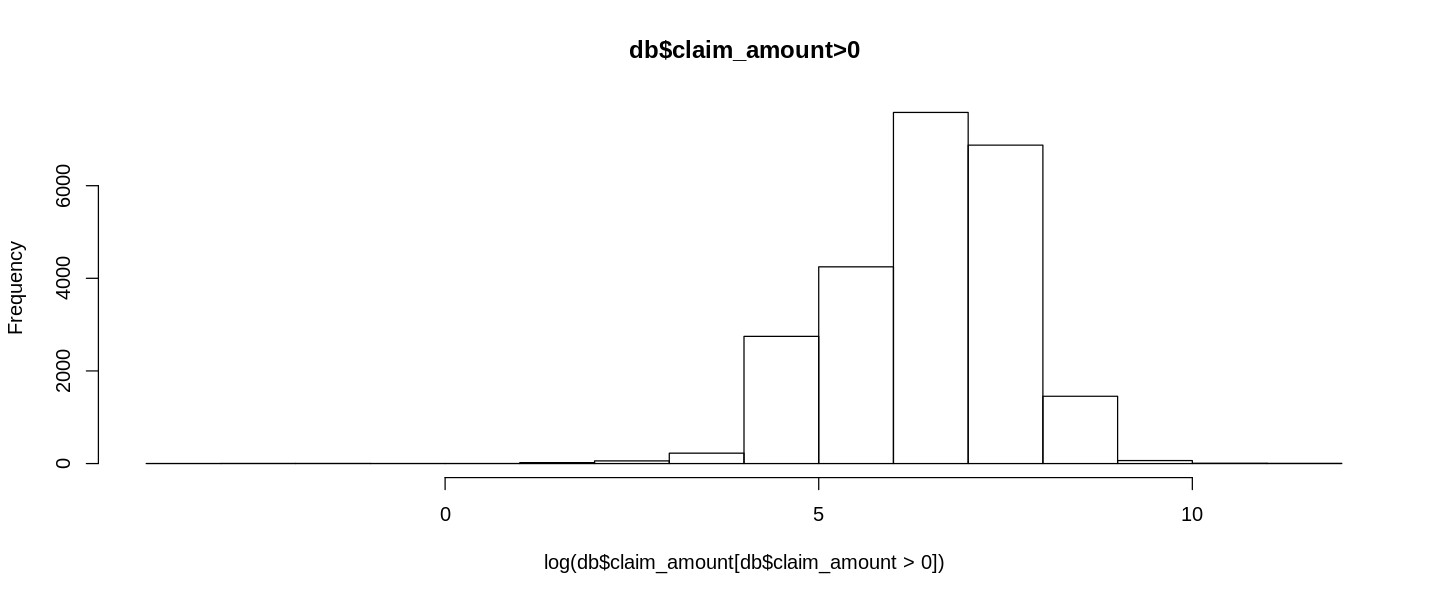

In [45]:
options(repr.plot.width=12, repr.plot.height=5)
hist(log(db$claim_amount[db$claim_amount>0]),main="db$claim_amount>0")

In [46]:
threshold = 10000
indice <- which(db$claim_amount<=threshold)
b<- db$claim_amount[-indice]
length(b)
(length(b)/sum(db$claim_amount>0))*100

[1] 41

[1] 0,1760261

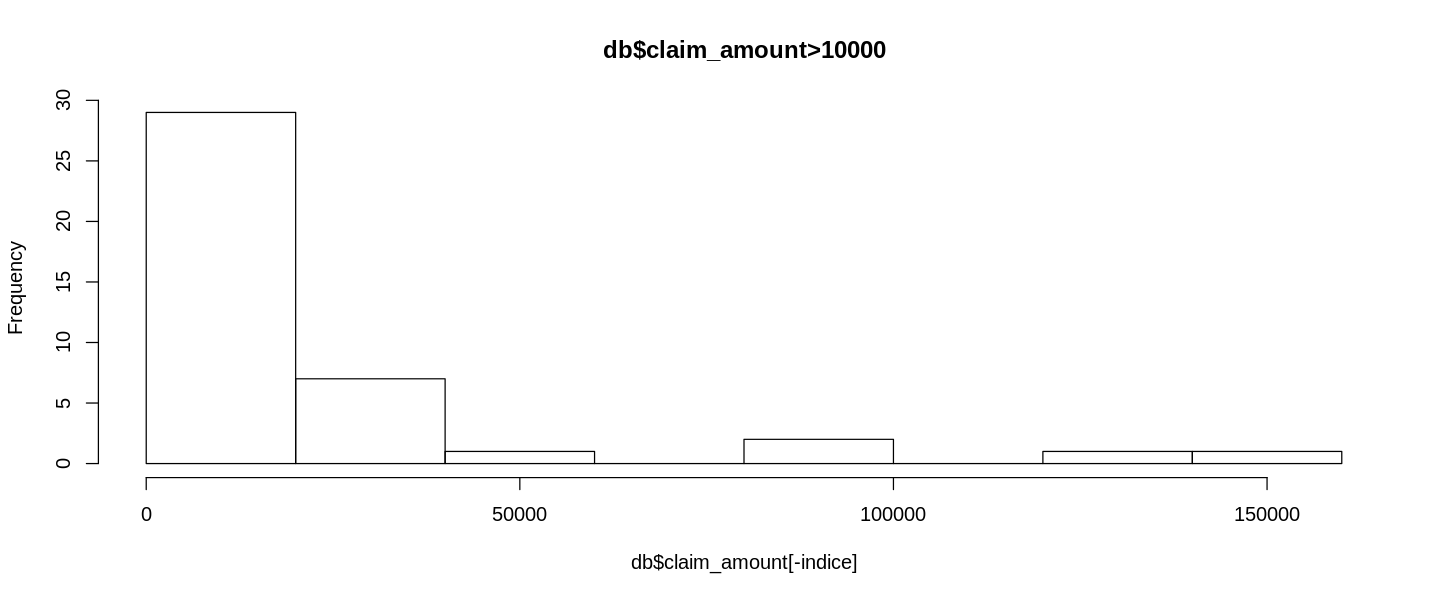

In [47]:
options(repr.plot.width=12, repr.plot.height=5)
hist(db$claim_amount[-indice],main="db$claim_amount>10000")

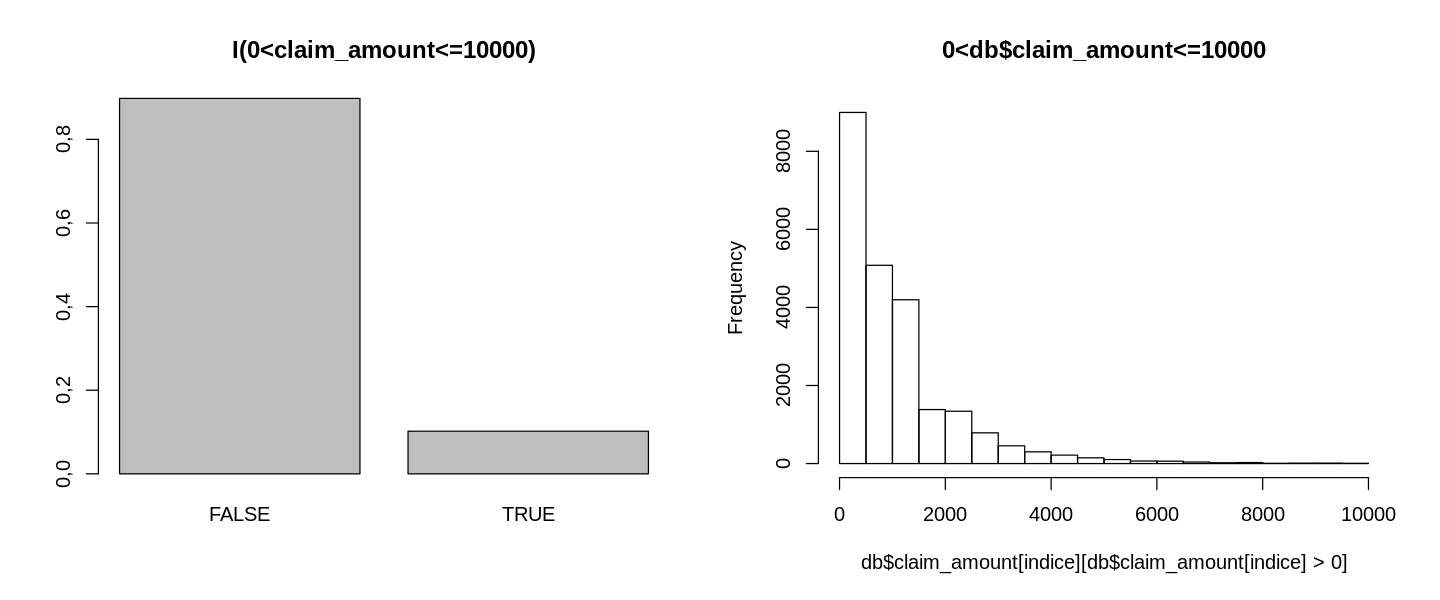

In [48]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
barplot(round(table(db$claim_amount[indice]>0)/length(db$claim_amount[indice]),3),main="I(0<claim_amount<=10000)")
hist(db$claim_amount[indice][db$claim_amount[indice]>0],main="0<db$claim_amount<=10000")

## Univariate Analysis

In [49]:
zero_claims <- db$claim_amount==0

In [50]:
preprocess_X_data <- function (x_raw){
	# Data preprocessing function: given X_raw, clean the data for training or prediction.

	# Parameters
	# ----------
	# X_raw : Dataframe, with the columns described in the data dictionary.
	# 	Each row is a different contract. This data has not been processed.

	# Returns
	# -------
	# A cleaned / preprocessed version of the dataset

  # YOUR CODE HERE ------------------------------------------------------

  # picking 2 features
  k = which(names(x_raw)%in%c("drv_sex1","vh_weight"))

  # defining the cleaned data covert to a factor
  X_clean = x_raw[,k]
  X_clean[,"drv_sex1"]=as.factor(X_clean[,"drv_sex1"])

  # getting rid of missing weights
  i = 2
  X_clean[is.na(X_clean[,i]),i] = mean(X_clean[!is.na(X_clean[,i]),i])
  
  # ---------------------------------------------------------------------
  return(X_clean) # change this to return the cleaned data
}

In [51]:
saveRDS(db, file = "training.rds")

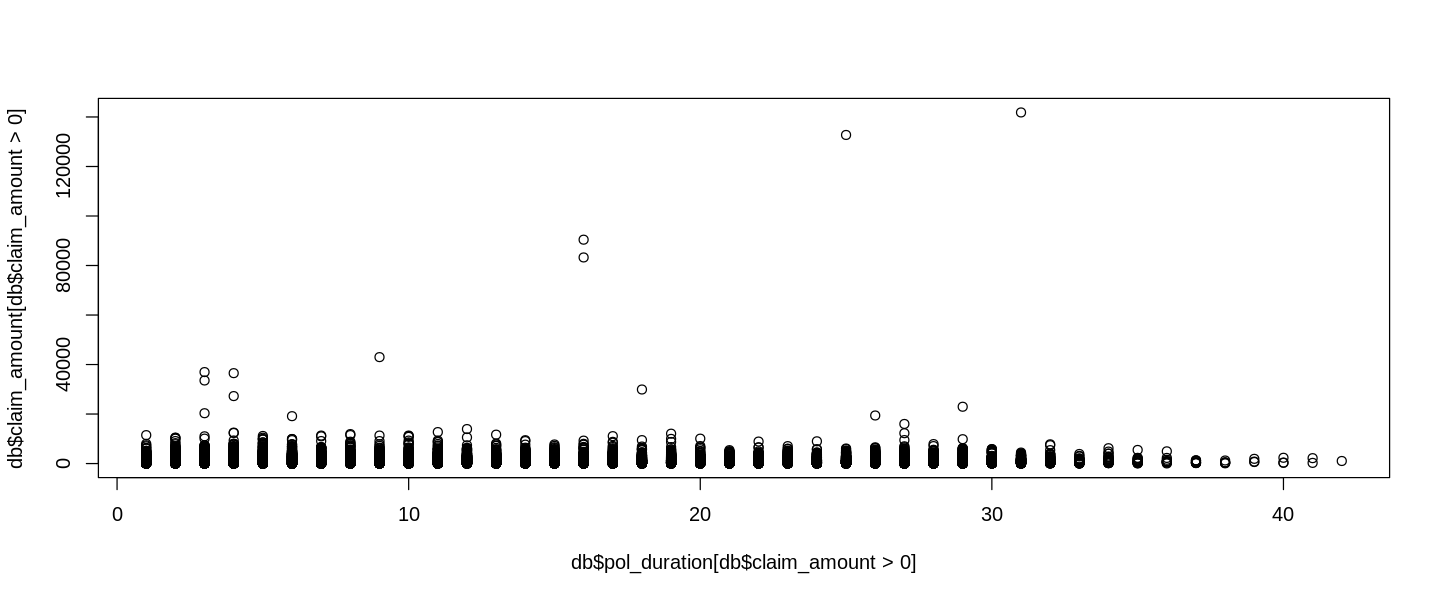

In [52]:
plot(db$pol_duration[db$claim_amount>0],db$claim_amount[db$claim_amount>0])